In [2]:
import pandas as pd
import warnings
import re

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r'Datathon_TrainData_org.csv')

In [5]:
summary=df.info()
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1614 non-null   object
 1   Date                  1614 non-null   object
 2   Speaker               1613 non-null   object
 3   Headline              1612 non-null   object
 4   Text_of_Speech        1611 non-null   object
 5   Designation           1605 non-null   object
 6   Running President/PM  1605 non-null   object
 7   Speech Link           1605 non-null   object
 8   Emotion               1605 non-null   object
 9   Context               1605 non-null   object
dtypes: object(10)
memory usage: 126.5+ KB
None


# dropping unwanted rows

In [6]:
df = df.drop(columns=['Country', 'Date','Speaker','Headline','Running President/PM','Designation','Speech Link','Context'])

In [7]:
df

,Text_of_Speech,Emotion
0,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\...",UPSET
1,"THE PRESIDENT: Good evening, my fellow Americ...",OPTIMISM
2,"Good afternoon, dear colleagues,\n\nOur meetin...",NEUTRAL
3,"Good afternoon, everybody. This sound system i...",NEUTRAL
4,More Americans voted in the 2020 elections tha...,UPSET
...,...,...
1612,Good afternoon I have just been to see Her Maj...,OPTIMISM
1613,"This February, during Black History Month, I c...",OPTIMISM
1614,Thank you so much. Everybody have a seat. We...,NEUTRAL
1615,"Colleagues,\nFriends,\n\nIn 2013, President Xi...",JOY


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot
from matplotlib.pyplot import suptitle
%matplotlib inline

#counts of sincere and insincere question texts:
count=df['Emotion'].value_counts()
print('Total Counts of both sets\n'.format(),count)

Total Counts of both sets
 NEUTRAL     477
OPTIMISM    467
JOY         422
UPSET       239
Name: Emotion, dtype: int64


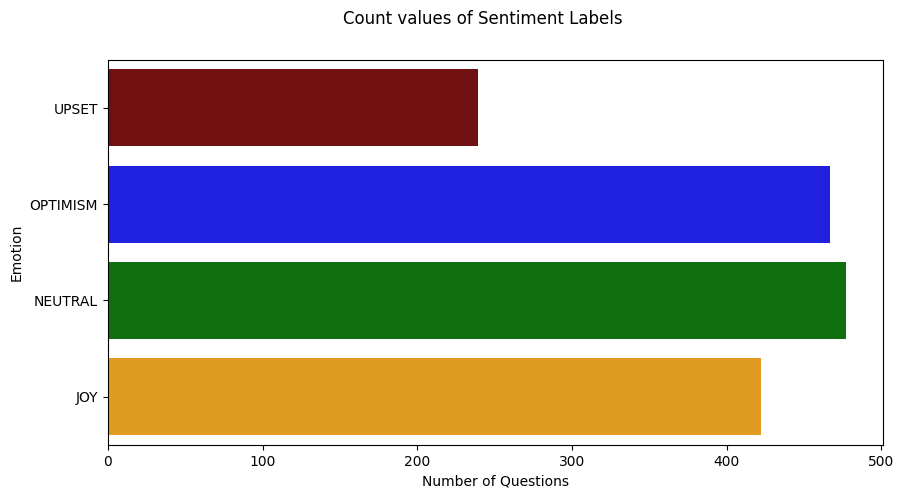

In [9]:
# Create the count plot
plt.figure(figsize=(10, 5))
sns.countplot(y="Emotion", palette=['maroon', 'blue', 'green', 'orange'], data=df)
plt.suptitle("Count values of Sentiment Labels")
plt.xlabel("Number of Questions")
plt.show()

# checking null count in each column in df

In [10]:
null_counts = df.isnull().sum()
print("Null counts for each column:")
print(null_counts)

Null counts for each column:
Text_of_Speech     6
Emotion           12
dtype: int64


# labels cleaning

In [11]:
df['Emotion'].isnull().sum()

12

In [12]:
labels=df['Emotion'].unique()

In [13]:
labels

array(['UPSET', 'OPTIMISM', 'NEUTRAL', 'JOY', nan], dtype=object)

In [14]:
df= df.dropna(subset=['Emotion'])

In [15]:
labels=df['Emotion'].unique()

In [16]:
labels

array(['UPSET', 'OPTIMISM', 'NEUTRAL', 'JOY'], dtype=object)

In [17]:
df['Emotion'].isnull().sum()

0

# text null values

In [18]:
df['Text_of_Speech'].isnull().sum()

0

# preprocessing of Text_of_Speech

# convert to lower

In [19]:
def lower(x):
    return x.lower()
df['Text_of_Speech']=df['Text_of_Speech'].apply(lower)    

In [20]:
df

,Text_of_Speech,Emotion
0,"esteemed mr lebedev,\n\nladies and gentlemen:\...",UPSET
1,"the president: good evening, my fellow americ...",OPTIMISM
2,"good afternoon, dear colleagues,\n\nour meetin...",NEUTRAL
3,"good afternoon, everybody. this sound system i...",NEUTRAL
4,more americans voted in the 2020 elections tha...,UPSET
...,...,...
1612,good afternoon i have just been to see her maj...,OPTIMISM
1613,"this february, during black history month, i c...",OPTIMISM
1614,thank you so much. everybody have a seat. we...,NEUTRAL
1615,"colleagues,\nfriends,\n\nin 2013, president xi...",JOY


# replace emojis with words if present

In [21]:
from emot.emo_unicode import UNICODE_EMOJI
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text  
df['Text_of_Speech'] = df['Text_of_Speech'].apply(convert_emojis)

In [22]:
df

,Text_of_Speech,Emotion
0,"esteemed mr lebedev,\n\nladies and gentlemen:\...",UPSET
1,"the president: good evening, my fellow americ...",OPTIMISM
2,"good afternoon, dear colleagues,\n\nour meetin...",NEUTRAL
3,"good afternoon, everybody. this sound system i...",NEUTRAL
4,more americans voted in the 2020 elections tha...,UPSET
...,...,...
1612,good afternoon i have just been to see her maj...,OPTIMISM
1613,"this february, during black history month, i c...",OPTIMISM
1614,thank you so much. everybody have a seat. we...,NEUTRAL
1615,"colleagues,\nfriends,\n\nin 2013, president xi...",JOY


# tokenize

In [23]:
from nltk.tokenize import word_tokenize
def tokenize(x):
    return word_tokenize(x)
df['Text_of_Speech']=df['Text_of_Speech'].apply(tokenize)

In [24]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ,, ladies, and, gentle...",UPSET
1,"[the, president, :, good, evening, ,, my, fell...",OPTIMISM
2,"[good, afternoon, ,, dear, colleagues, ,, our,...",NEUTRAL
3,"[good, afternoon, ,, everybody, ., this, sound...",NEUTRAL
4,"[more, americans, voted, in, the, 2020, electi...",UPSET
...,...,...
1612,"[good, afternoon, i, have, just, been, to, see...",OPTIMISM
1613,"[this, february, ,, during, black, history, mo...",OPTIMISM
1614,"[thank, you, so, much, ., everybody, have, a, ...",NEUTRAL
1615,"[colleagues, ,, friends, ,, in, 2013, ,, presi...",JOY


# remove punctuations

In [25]:
def remove_punct(x):
    import string
    punct_tag=set(string.punctuation)
    t=[i for i in x if i not in punct_tag]
    return t
      
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_punct)

In [26]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ladies, and, gentlemen...",UPSET
1,"[the, president, good, evening, my, fellow, am...",OPTIMISM
2,"[good, afternoon, dear, colleagues, our, meeti...",NEUTRAL
3,"[good, afternoon, everybody, this, sound, syst...",NEUTRAL
4,"[more, americans, voted, in, the, 2020, electi...",UPSET
...,...,...
1612,"[good, afternoon, i, have, just, been, to, see...",OPTIMISM
1613,"[this, february, during, black, history, month...",OPTIMISM
1614,"[thank, you, so, much, everybody, have, a, sea...",NEUTRAL
1615,"[colleagues, friends, in, 2013, president, xi,...",JOY


# remove extra white spaces

In [27]:
def whites(x):
    w={' '}
    x=[i for i in x if i not in w]
    return x
df['Text_of_Speech']=df['Text_of_Speech'].apply(whites)    

In [28]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ladies, and, gentlemen...",UPSET
1,"[the, president, good, evening, my, fellow, am...",OPTIMISM
2,"[good, afternoon, dear, colleagues, our, meeti...",NEUTRAL
3,"[good, afternoon, everybody, this, sound, syst...",NEUTRAL
4,"[more, americans, voted, in, the, 2020, electi...",UPSET
...,...,...
1612,"[good, afternoon, i, have, just, been, to, see...",OPTIMISM
1613,"[this, february, during, black, history, month...",OPTIMISM
1614,"[thank, you, so, much, everybody, have, a, sea...",NEUTRAL
1615,"[colleagues, friends, in, 2013, president, xi,...",JOY


# stopwords

In [29]:
from nltk.corpus import stopwords
import nltk
def re_stop(x):
    nltk_stopwords = nltk.corpus.stopwords.words("english")
    return [ token for token in x if token not in nltk_stopwords]
df['Text_of_Speech']=df['Text_of_Speech'].apply(re_stop)  

In [30]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ladies, gentlemen, gat...",UPSET
1,"[president, good, evening, fellow, americans, ...",OPTIMISM
2,"[good, afternoon, dear, colleagues, meeting, t...",NEUTRAL
3,"[good, afternoon, everybody, sound, system, re...",NEUTRAL
4,"[americans, voted, 2020, elections, election, ...",UPSET
...,...,...
1612,"[good, afternoon, see, majesty, queen, invited...",OPTIMISM
1613,"[february, black, history, month, call, americ...",OPTIMISM
1614,"[thank, much, everybody, seat, well, welcome, ...",NEUTRAL
1615,"[colleagues, friends, 2013, president, xi, jin...",JOY


# Removes Numbers

In [31]:
def remove_num(data):
    data=' '.join(data)
    tag=re.compile(r'[0-9]+')
    data=tag.sub(r' ',data)
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_num) 

In [32]:
df

,Text_of_Speech,Emotion
0,esteemed mr lebedev ladies gentlemen gathered ...,UPSET
1,president good evening fellow americans want t...,OPTIMISM
2,good afternoon dear colleagues meeting today d...,NEUTRAL
3,good afternoon everybody sound system really p...,NEUTRAL
4,americans voted elections election nation ’ ...,UPSET
...,...,...
1612,good afternoon see majesty queen invited form ...,OPTIMISM
1613,february black history month call american peo...,OPTIMISM
1614,thank much everybody seat well welcome white h...,NEUTRAL
1615,colleagues friends president xi jinping prop...,JOY


# remove roamns if present

In [33]:
def remove_roman(data):
    en_tag =re.compile(r'^M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$')
    data=en_tag.sub(r' ',data)
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_roman)

In [34]:
df

,Text_of_Speech,Emotion
0,esteemed mr lebedev ladies gentlemen gathered ...,UPSET
1,president good evening fellow americans want t...,OPTIMISM
2,good afternoon dear colleagues meeting today d...,NEUTRAL
3,good afternoon everybody sound system really p...,NEUTRAL
4,americans voted elections election nation ’ ...,UPSET
...,...,...
1612,good afternoon see majesty queen invited form ...,OPTIMISM
1613,february black history month call american peo...,OPTIMISM
1614,thank much everybody seat well welcome white h...,NEUTRAL
1615,colleagues friends president xi jinping prop...,JOY


# Remove redundant words

In [35]:
def remove_redun(data):
    red_tag=re.compile(r'[?<=(  )\\]|[&&|\|\|-]')
    data=red_tag.sub(r' ',data)
    data=data.split(" ")
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_redun)

In [36]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ladies, gentlemen, gat...",UPSET
1,"[president, good, evening, fellow, americans, ...",OPTIMISM
2,"[good, afternoon, dear, colleagues, meeting, t...",NEUTRAL
3,"[good, afternoon, everybody, sound, system, re...",NEUTRAL
4,"[americans, voted, , , elections, election, na...",UPSET
...,...,...
1612,"[good, afternoon, see, majesty, queen, invited...",OPTIMISM
1613,"[february, black, history, month, call, americ...",OPTIMISM
1614,"[thank, much, everybody, seat, well, welcome, ...",NEUTRAL
1615,"[colleagues, friends, , , president, xi, jinpi...",JOY


# stemming

In [37]:
# from nltk.stem.porter import PorterStemmer
# def stemm(x):
#     l=[]
#     for i in x:
#         l.append(PorterStemmer().stem(i))
#     return l    
# df['Text_of_Speech']=df['Text_of_Speech'].apply(stemm)  

In [38]:
# df

# lemmatiazation

technique that reduces words to their base or dictionary form, ensuring variants of a word are transformed to a common root. 

In [39]:
from nltk.stem import WordNetLemmatizer
def lemm(x):
    l=[]
    for i in x:
        l.append(WordNetLemmatizer().lemmatize(i))
    return l    
df['Text_of_Speech']=df['Text_of_Speech'].apply(lemm)

In [40]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, lady, gentleman, gathe...",UPSET
1,"[president, good, evening, fellow, american, w...",OPTIMISM
2,"[good, afternoon, dear, colleague, meeting, to...",NEUTRAL
3,"[good, afternoon, everybody, sound, system, re...",NEUTRAL
4,"[american, voted, , , election, election, nati...",UPSET
...,...,...
1612,"[good, afternoon, see, majesty, queen, invited...",OPTIMISM
1613,"[february, black, history, month, call, americ...",OPTIMISM
1614,"[thank, much, everybody, seat, well, welcome, ...",NEUTRAL
1615,"[colleague, friend, , , president, xi, jinping...",JOY


# combine again to speech

In [41]:
def combine(x):
    return ' '.join(x)
df['Text_of_Speech']=df['Text_of_Speech'].apply(combine)

In [42]:
df

,Text_of_Speech,Emotion
0,esteemed mr lebedev lady gentleman gathered su...,UPSET
1,president good evening fellow american want ta...,OPTIMISM
2,good afternoon dear colleague meeting today de...,NEUTRAL
3,good afternoon everybody sound system really p...,NEUTRAL
4,american voted election election nation ’ hi...,UPSET
...,...,...
1612,good afternoon see majesty queen invited form ...,OPTIMISM
1613,february black history month call american peo...,OPTIMISM
1614,thank much everybody seat well welcome white h...,NEUTRAL
1615,colleague friend president xi jinping propos...,JOY


In [43]:
X=df['Text_of_Speech']
Y=df['Emotion']

In [44]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [45]:
import gensim

In [46]:
X_train_vect_avg = []
X_test_vect_avg = []
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
w2v_model = gensim.models.Word2Vec(X_train, vector_size=100, window=5, min_count=2)
words = set(w2v_model.wv.index_to_key)
X_train_vect = np.array(
    [np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train]
)
X_test_vect = np.array(
    [np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test]
)
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))
X_train_vtc = X_train_vect_avg
X_test_vtc = X_test_vect_avg
y_train = y_train.values.ravel()
X_train = X_train_vect_avg
X_test = X_test_vect_avg


In [47]:
from sklearn.linear_model import LogisticRegression
model_l=LogisticRegression().fit(X_train,y_train)
y_pred=model_l.predict(X_test)
score=classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

         JOY       0.54      0.21      0.31       140
     NEUTRAL       0.37      0.73      0.49       134
    OPTIMISM       0.37      0.46      0.41       130
       UPSET       0.00      0.00      0.00        78

    accuracy                           0.39       482
   macro avg       0.32      0.35      0.30       482
weighted avg       0.36      0.39      0.34       482



In [48]:
from sklearn.svm import SVC
rf_kn =SVC()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

              precision    recall  f1-score   support

         JOY       0.45      0.06      0.11       140
     NEUTRAL       0.37      0.72      0.49       134
    OPTIMISM       0.34      0.52      0.41       130
       UPSET       0.00      0.00      0.00        78

    accuracy                           0.36       482
   macro avg       0.29      0.33      0.25       482
weighted avg       0.32      0.36      0.28       482



In [49]:
from sklearn.tree import DecisionTreeClassifier
rf_kn = DecisionTreeClassifier()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

              precision    recall  f1-score   support

         JOY       0.35      0.36      0.35       140
     NEUTRAL       0.40      0.43      0.41       134
    OPTIMISM       0.35      0.33      0.34       130
       UPSET       0.29      0.27      0.28        78

    accuracy                           0.35       482
   macro avg       0.35      0.35      0.35       482
weighted avg       0.35      0.35      0.35       482



In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_kn = RandomForestClassifier()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

              precision    recall  f1-score   support

         JOY       0.45      0.41      0.43       140
     NEUTRAL       0.45      0.56      0.50       134
    OPTIMISM       0.33      0.42      0.37       130
       UPSET       0.48      0.14      0.22        78

    accuracy                           0.41       482
   macro avg       0.43      0.38      0.38       482
weighted avg       0.42      0.41      0.40       482

